# Random Forests
#### Abstract
This assignment describes Random Forests, a machine learning method for classification which is based on decision trees. The assignment first provides an introduction on Random forests, describing the technique and the relationship to decision trees. Then, the assignment describes a practical use case and includes an implementation example using standard libraries like [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The last section includes some final conclusions. 



#Introduction 
## Decision Trees
Provide a description of how decision trees can be used to solve classification problems. Find some inspiration [here](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)

## Random forests
Then, describe random forests. 



# Implementation
## Practical use case
We are going to predict next day's max temperature in the city of Valencia based on the data of previous years from aemet and some (randomized) claims from a friend who claims to know how to predict the future.
For this task we will use random forests and python to train a machine learning model and be able to predict this temperature.
Finally our model got a mean absolute error of 1.52ºC, which means that the average real value vs the predicted is on average in an interval of +- 1.52ºC.
Therefore our model got an accuracy of 92.4 %.
Here is the code implementation:
## Random forests in Python
### Imports

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime
from IPython.display import Image

### Loading AEMET Tidyed Data and checking
We have previously processed the raw data from aemet, check the script DBProcessing.py for mor info on this.
Now we load the output and plot the data.

<Figure size 432x288 with 0 Axes>

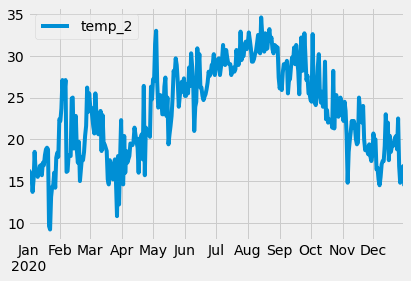

<Figure size 432x288 with 0 Axes>

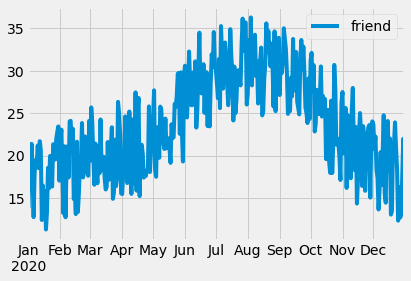

<Figure size 432x288 with 0 Axes>

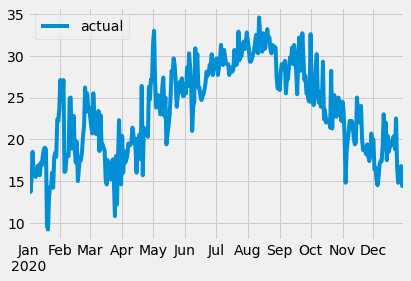

<Figure size 432x288 with 0 Axes>

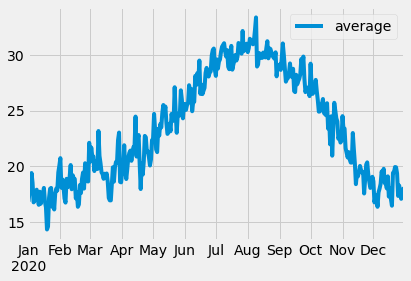

In [46]:
features = pd.read_csv('aemet_db_tidy.csv')
date_index = pd.date_range('01/02/2016', periods=features.shape[0], freq='D')
features.index = date_index
features_2020 = features.query("year == 2020")

cols = ['temp_2', 'friend', 'actual', 'average']
for col in cols:
    plt.figure()
    features_2020[[col]].plot()

### One hot encoding
We need to transform the categorical factor, week day, to a numerical one, if we assign an index from 1 to 7 to every weekday, in the training process it could interpret that the sunday (index 7), has a higher importance which is simply not true, we enconde it using 1 and 0 as displayed below.

In [47]:
features_2020 = pd.get_dummies(features_2020)
features_2020.head(7)

year  month  day  temp_2  temp_1  average  actual  friend  \
2020-01-01  2020      1    1    15.4    16.2    16.80    15.1   13.80   
2020-01-02  2020      1    2    16.2    15.1    17.62    15.6   18.62   
2020-01-03  2020      1    3    15.1    15.6    17.92    13.7   17.92   
2020-01-04  2020      1    4    15.6    13.7    19.38    15.2   21.38   
2020-01-05  2020      1    5    13.7    15.2    18.50    18.5   17.50   
2020-01-06  2020      1    6    15.2    18.5    16.74    16.1   12.74   
2020-01-07  2020      1    7    18.5    16.1    16.88    16.0   17.88   

            week_Fri  week_Mon  week_Sat  week_Sun  week_Thu  week_Tue  \
2020-01-01         0         0         0         0         0         0   
2020-01-02         0         0         0         0         1         0   
2020-01-03         1         0         0         0         0         0   
2020-01-04         0         0         1         0         0         0   
2020-01-05         0         0         0         1         0         0   
2020-01-06         0         1         0         0         0         0   
2020-01-07         0         0         0         0         0         1   

            week_Wed  
2020-01-01         1  
2020-01-02         0  
2020-01-03         0  
2020-01-04         0  
2020-01-05         0  
2020-01-06         0  
2020-01-07         0

### Moving to Numpy
For the python library SKlearn, we need to use numpy objects to enter it.

In [48]:
labels = np.array(features_2020['actual'])
features_2020 = features_2020.drop('actual', axis = 1)
feature_list = list(features_2020.columns)
features_2020 = np.array(features_2020)

### Splitting into training and testing
Now we need to split the data from aemet in 2 groups, 75% of the data will be used for training the model and the other 25% remaining random data will be used for testing how good the model performs afterwards.
The label is the value we want to predict and the features are the values we use to predict the label.

In [49]:
train_features, test_features, train_labels, test_labels = train_test_split(features_2020, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (274, 14)
Training Labels Shape: (274,)
Testing Features Shape: (92, 14)
Testing Labels Shape: (92,)


### Set our baseline to beat
We already computed the average value of the max temperature of the previous years of that day in that month, so we already have an estimate of the value we want to predict, our model should aim to improve this prediction, otherwise we should try different methods.

In [50]:
baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  1.9


### Training the model
Now we train the model using SKLearn

In [51]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Checking how it performs
Now we want to check how well the model performs.

In [52]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.52 degrees.
Accuracy: 92.4 %.


### Graphing the trees
We are going to plot a tree of our model and a smaller tree of up to 3 levels down to better see it.

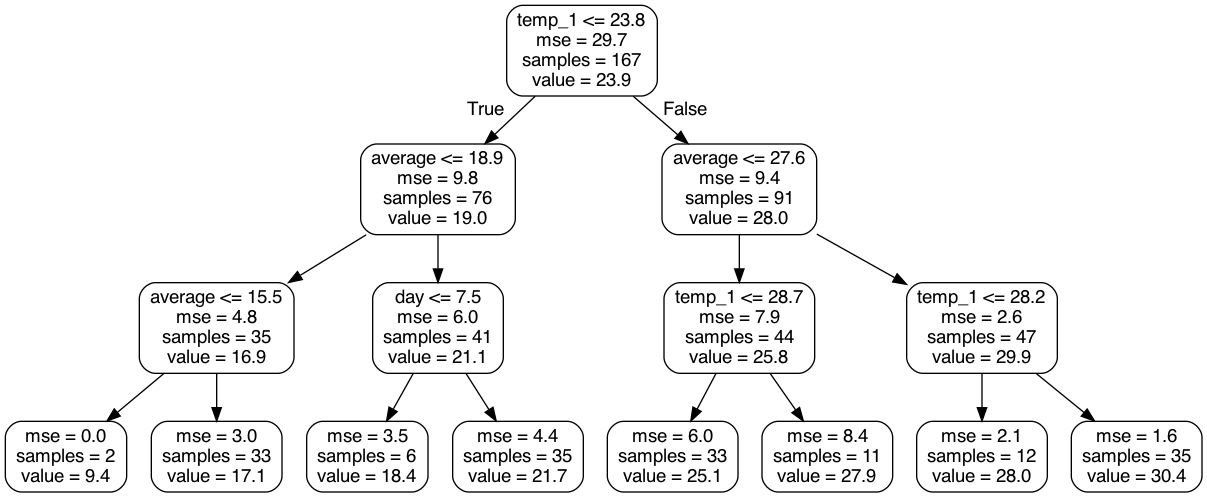

In [53]:
tree = rf.estimators_[5]
tree = rf.estimators_[5]
export_graphviz(tree, out_file='tree.dot', feature_names=feature_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(filename='tree.png')

# Graph a smaller tree

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
Image(filename='small_tree.png')

### Calculating the important factors
Not all the factors are relevant to the model and they add noise to it.
For example, the day of the week that it is (Monday, Tuesday...) has no relation at all to the temperature of a day, we are going to plot the importance of each factor.
These non relevant variables could be removed to create a better model.

Variable: average              Importance: 0.49
Variable: temp_1               Importance: 0.38
Variable: temp_2               Importance: 0.06
Variable: friend               Importance: 0.03
Variable: day                  Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thu             Importance: 0.0
Variable: week_Tue             Importance: 0.0
Variable: week_Wed             Importance: 0.0


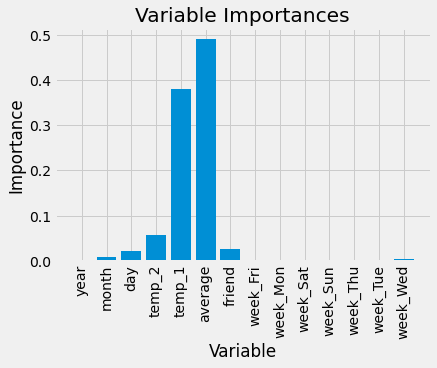

In [54]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

### Plot model predictions
We now plot our model predictions for the 25% testing set against the real values.

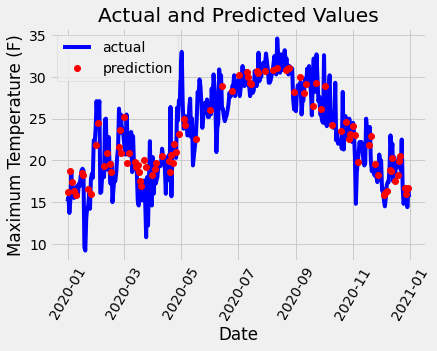

In [55]:
months = features_2020[:, feature_list.index('month')]
days = features_2020[:, feature_list.index('day')]
years = features_2020[:, feature_list.index('year')]
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')
plt.show()

# Conclusion

Creating machine learning models is really easy nowadays with the help of python and SKLearn, at the end of the day, creating the model was just 3 lines of code.
We obtained pretty good results for our model and it was actually the most basic one to do, we could have improved it quite a bit by tweaking it and adding more relevant data that we have availabe from aemet.
We could have also chosen a different method for predicting temperature but random forest was the topic of this assignment and it indeed ended up beign a good fit after all.

# References

[Random Forest in Python - towardsdatascience.com](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
